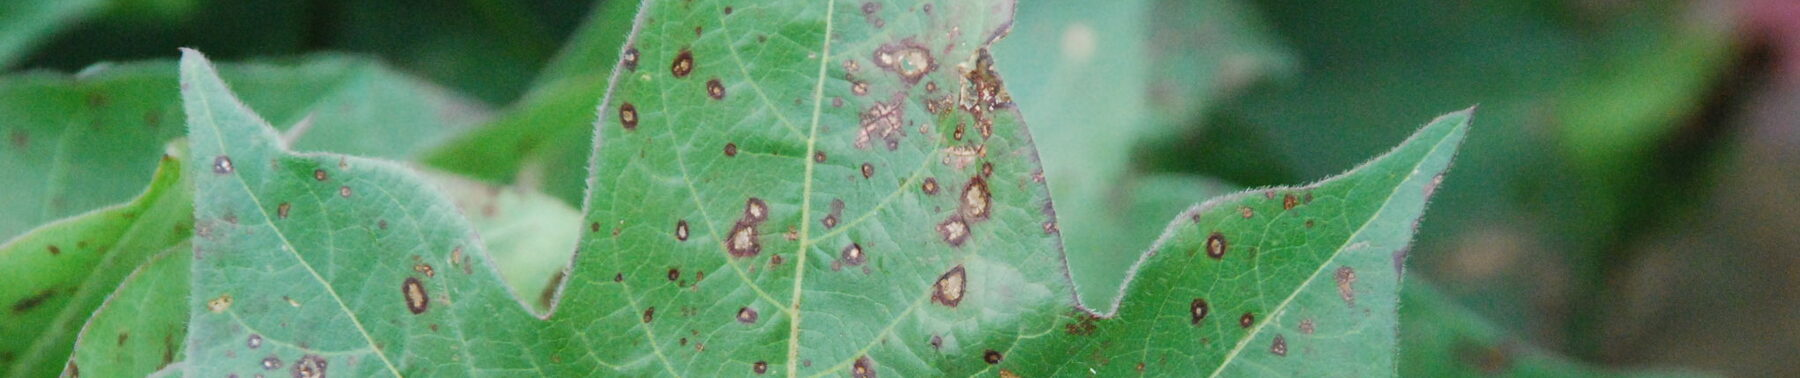

# About the data

This dataset is recreated using offline augmentation from the original dataset. The original dataset can be found on this github repo. This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

# Importing Libraries

In [3]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

# Train Data Loading and Exploring

In [4]:
data_dir = "../input/new-plant-diseases-dataset/"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [5]:
diseases

['Peach___Bacterial_spot',
 'Tomato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Pepper,_bell___Bacterial_spot',
 'Potato___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Corn_(maize)___healthy',
 'Raspberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___healthy',
 'Pepper,_bell___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___Early_blight',
 'Blueberry___healthy',
 'Apple___Apple_scab',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Grape___Esca_(Black_Measles)',
 'Apple___Cedar_apple_rust',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Black_rot',
 'Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Tomato___Target_Spot',
 'Apple___Black_rot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Soybean___healthy',
 'Tomato___healthy',
 'Corn_(maize)___Common_rust_',
 'Tomato___Leaf_Mold',
 'Potato___Late_blight',
 'Squash___Powdery_mildew',
 'Che

In [6]:
# show number of total classes 
print("Number of classes : " ,len(diseases))

Number of classes :  38


In [7]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
Peach___Bacterial_spot                                       1838
Tomato___Late_blight                                         1851
Cherry_(including_sour)___Powdery_mildew                     1683
Pepper,_bell___Bacterial_spot                                1913
Potato___healthy                                             1824
Orange___Haunglongbing_(Citrus_greening)                     2010
Corn_(maize)___healthy                                       1859
Raspberry___healthy                                          1781
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Bacterial_spot                                      1702
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Apple___healthy                                              2008
Pepper,_bell___healthy                                       1988
Corn_(maize)___Northern_Leaf_Blight                          1908
Potato___Early_blight                                        1939
Blueberry___healthy                                          1816
Apple___Apple_scab                                           2016
Tomato___Spider_mites Two-spotted_spider_mite                1741
Grape___Esca_(Black_Measles)                                 1920
Apple___Cedar_apple_rust                                     1760
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Grape___Black_rot                                            1888
Strawberry___Leaf_scorch                                     1774
Grape___healthy                                              1692
Tomato___Target_Spot                                         1827
Apple___Black_rot                                            1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Soybean___healthy                                            2022
Tomato___healthy                                             1926
Corn_(maize)___Common_rust_                                  1907
Tomato___Leaf_Mold                                           1882
Potato___Late_blight                                         1939
Squash___Powdery_mildew                                      1736
Cherry_(including_sour)___healthy                            1826
Peach___healthy                                              1728
Strawberry___healthy                                         1824
Tomato___Septoria_leaf_spot                                  1745
Tomato___Early_blight                                        1920

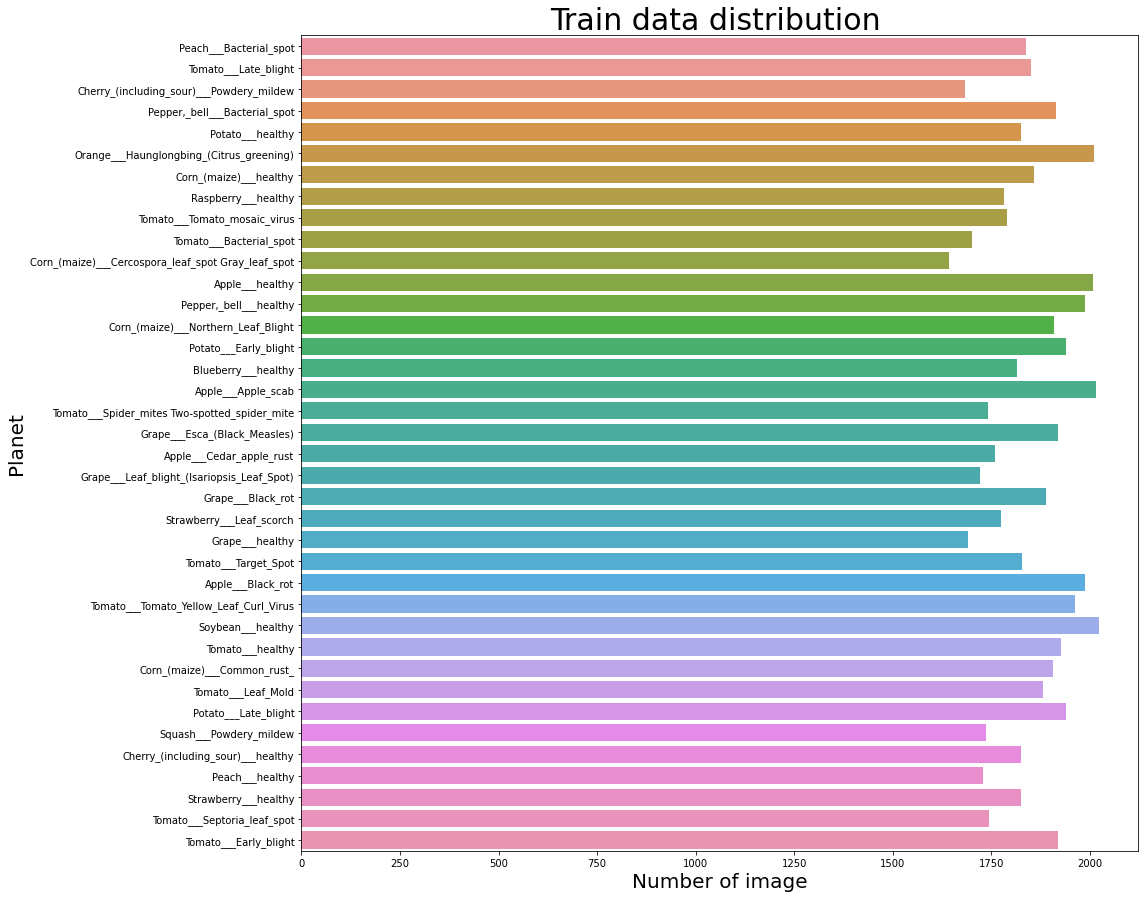

In [8]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)


In [9]:
# show number of images in train data
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)


The number of images for training :  70295


In [10]:
plants=[]
diseases_unique=[]
for i in diseases:
  if(i.split('__'))[0] not in plants:
    plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])

In [11]:
# show names and number of plants
# Names
print('Plantes :',plants)
# Number of platns:
print('-'*100)
print('Number of plants : ',len(plants))

Plantes : ['Peach', 'Tomato', 'Cherry_(including_sour)', 'Pepper,_bell', 'Potato', 'Orange', 'Corn_(maize)', 'Raspberry', 'Apple', 'Blueberry', 'Grape', 'Strawberry', 'Soybean', 'Squash']

----------------------------------------------------------------------------------------------------

Number of plants :  14


In [12]:
# show names and number of unique diseases
# Names
print('diseases :',diseases_unique)
# Number of unique diseases:
print('-'*100)
print('Number of unique diseases : ',len(diseases_unique))

diseases : ['Bacterial_spot', 'Late_blight', 'Powdery_mildew', 'Bacterial_spot', 'Haunglongbing_(Citrus_greening)', 'Tomato_mosaic_virus', 'Bacterial_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Northern_Leaf_Blight', 'Early_blight', 'Apple_scab', 'Spider_mites Two-spotted_spider_mite', 'Esca_(Black_Measles)', 'Cedar_apple_rust', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Black_rot', 'Leaf_scorch', 'Target_Spot', 'Black_rot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Common_rust_', 'Leaf_Mold', 'Late_blight', 'Powdery_mildew', 'Septoria_leaf_spot', 'Early_blight']

----------------------------------------------------------------------------------------------------

Number of unique diseases :  26


### Distribution planets for each disease 

In [13]:
def create_data_frame(path):
    list_plant=[]
    list_category=[]
    list_disease=[]
    list_path=[]
    list_plant_category=[]
    list_image_size=[]
    list_image_type=[]
    list_size=[]
    
    for path,directory,files in os.walk(path,topdown=False):
        for name in files:
            plant_category=category=path.split("/")[-1]
            plant=plant_category.split("___")[0]
            category=plant_category.split("___")[-1]
            disease=0 if category=="healthy" else 1
            full_path=path+"/"+name
            image_type=name.split(".")[1]
            size=os.path.getsize(full_path)
            with Image.open(full_path) as images:
                width,height=images.size
            list_plant.append(plant)
            list_category.append(category)
            list_disease.append(disease)
            list_path.append(full_path)
            list_plant_category.append(plant_category)
            list_image_size.append(str(width)+"x"+str(height))
            list_image_type.append(image_type)
            list_size.append(size)                                  
    data_info=pd.DataFrame.from_dict({"Plant":list_plant,"Category":list_category,"Disease":list_disease,
                           "Path":list_path,"Plant_Category":list_plant_category,"Image_size":list_image_size,"Image_type":list_image_type,"Size":list_size},orient="columns")

    image_count_info=pd.DataFrame(data_info.groupby(["Plant","Category","Plant_Category"]).size())
    image_count_info.rename(columns={0:"nb"},inplace=True)
    image_count_info=image_count_info.reset_index()
    return data_info,image_count_info

train_data_info,train_data_count=create_data_frame(train_dir)
valid_data_info,valid_data_count=create_data_frame(valid_dir)

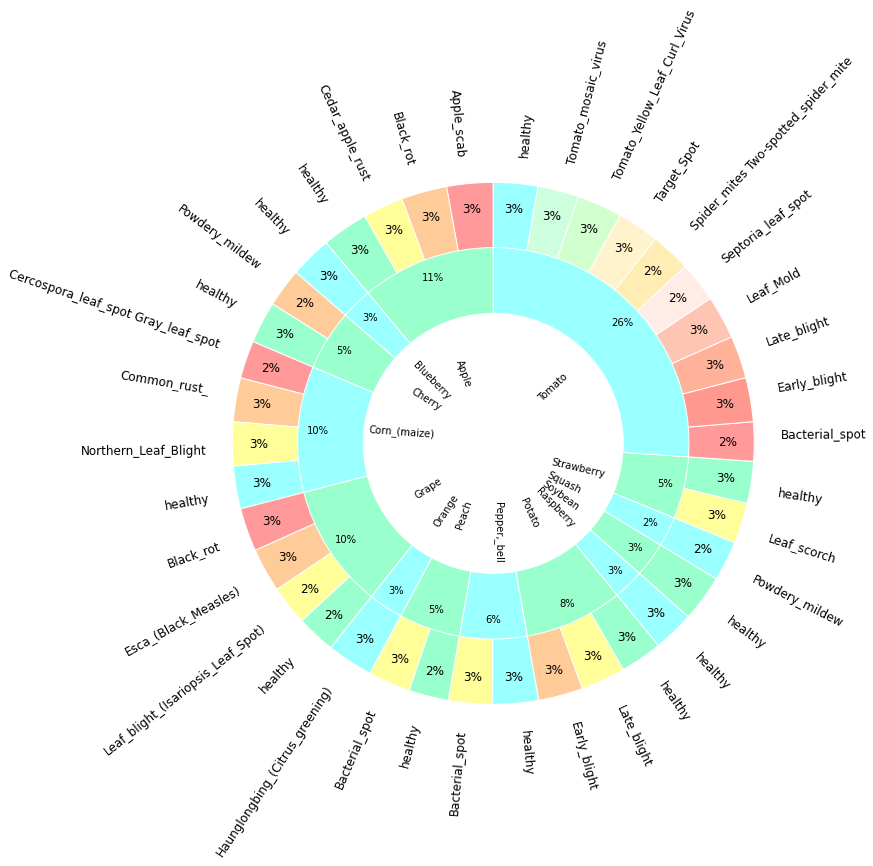

In [14]:
def  class_data_distribution(class_data_count,class_data_info):
    list_plant_mod= ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(class_data_count.Plant.unique())]


    pi_chart_color_0 = ['#99ffcc', '#99ffff', '#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff',]
    pi_chart_color_1 = ['#ff999a','#ffcb99', '#fffe99','#99ffcc',
  '#99ffff','#ffcb99', '#99ffcc','#ff999a','#ffcb99','#fffe99','#99ffff', '#ff999a','#ffcb99','#fffe99','#99ffcc',
  '#99ffff','#fffe99','#99ffcc','#fffe99','#99ffff','#ffcb99','#fffe99','#99ffcc','#99ffff','#99ffcc','#99ffff','#fffe99','#99ffcc',
  '#ff999a','#ff9990','#ffb299','#ffc5b3','#ffece6','#ffedb3','#fff3cd','#d1ffcd','#cdffdf','#99ffff']
 

    plt.pie(class_data_count.nb, labels=class_data_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=pi_chart_color_1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 12})
    plt.pie(class_data_info.groupby(['Plant']).size(),labels=list_plant_mod,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=pi_chart_color_0,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 10})
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
 
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12,12))
class_data_distribution(train_data_count,train_data_info)

# Validation Data 

In [15]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


no. of images
Peach___Bacterial_spot                                        459
Tomato___Late_blight                                          463
Cherry_(including_sour)___Powdery_mildew                      421
Pepper,_bell___Bacterial_spot                                 478
Potato___healthy                                              456
Orange___Haunglongbing_(Citrus_greening)                      503
Corn_(maize)___healthy                                        465
Raspberry___healthy                                           445
Tomato___Tomato_mosaic_virus                                  448
Tomato___Bacterial_spot                                       425
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Apple___healthy                                               502
Pepper,_bell___healthy                                        497
Corn_(maize)___Northern_Leaf_Blight                           477
Potato___Early_blight                                         485
Blueberry___healthy                                           454
Apple___Apple_scab                                            504
Tomato___Spider_mites Two-spotted_spider_mite                 435
Grape___Esca_(Black_Measles)                                  480
Apple___Cedar_apple_rust                                      440
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    430
Grape___Black_rot                                             472
Strawberry___Leaf_scorch                                      444
Grape___healthy                                               423
Tomato___Target_Spot                                          457
Apple___Black_rot                                             497
Tomato___Tomato_Yellow_Leaf_Curl_Virus                        490
Soybean___healthy                                             505
Tomato___healthy                                              481
Corn_(maize)___Common_rust_                                   477
Tomato___Leaf_Mold                                            470
Potato___Late_blight                                          485
Squash___Powdery_mildew                                       434
Cherry_(including_sour)___healthy                             456
Peach___healthy                                               432
Strawberry___healthy                                          456
Tomato___Septoria_leaf_spot                                   436
Tomato___Early_blight                                         480

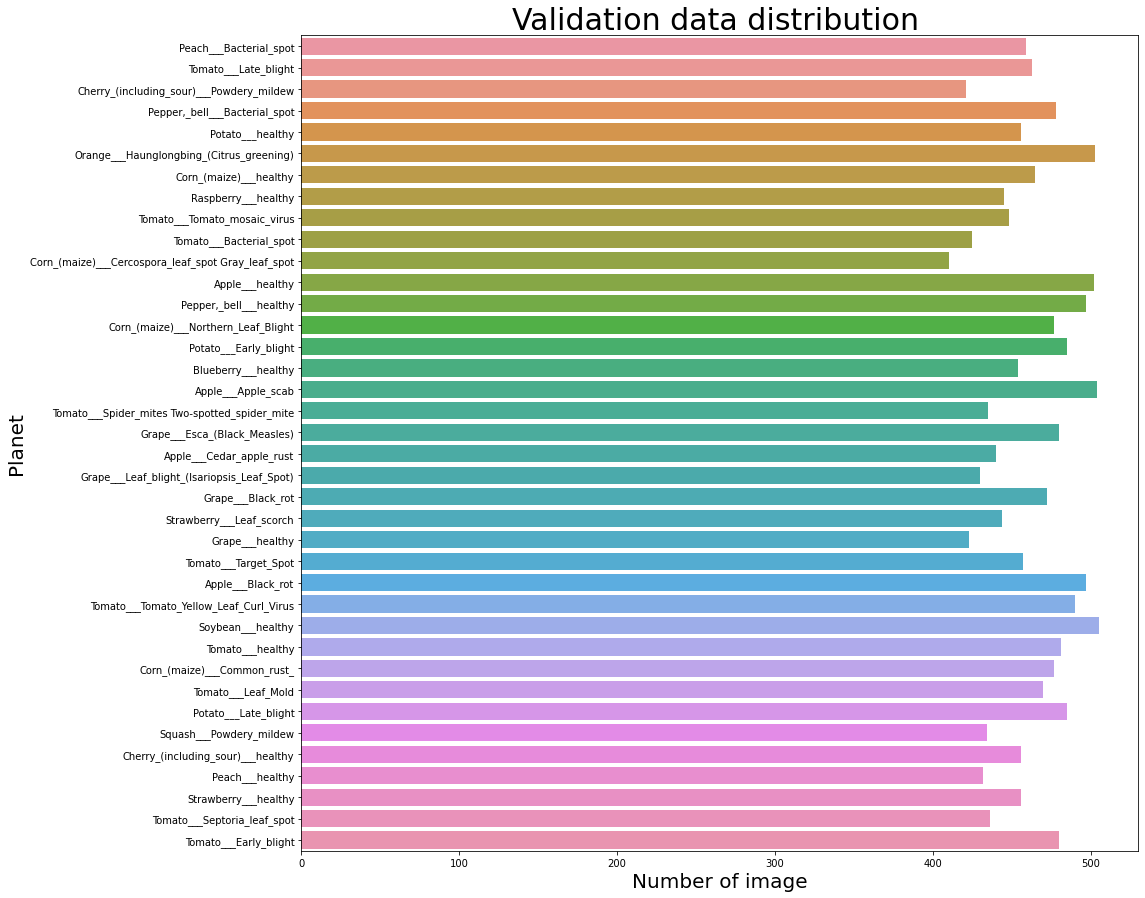

In [16]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_val.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)


In [17]:
# show number of images in validation data
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)


The number of images for validation :  17572


# Show some planets with different diseases

In [18]:
# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

## Apple 

### Healthy

Label :Apple___healthy(3)

Label :Apple___healthy(3)

Label :Apple___healthy(3)

Label :Apple___healthy(3)

Label :Apple___healthy(3)

Label :Apple___healthy(3)


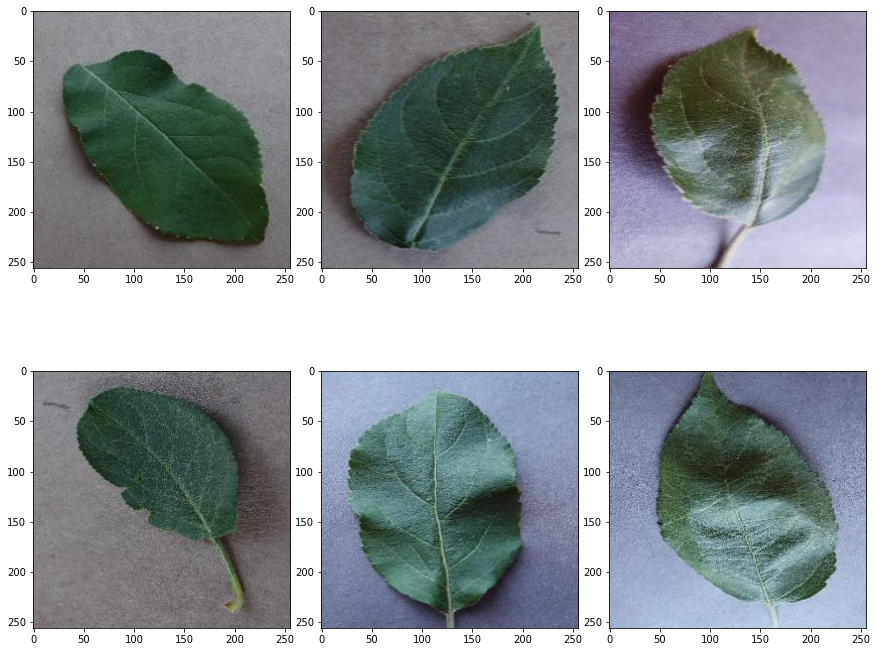

In [19]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[6100]))
axs[1, 0].imshow(show_image(*train[6200]))
axs[1,1].imshow(show_image(*train[6350]))
axs[0,2].imshow(show_image(*train[6370]))
axs[1,2].imshow(show_image(*train[6400]))

### Scab

Label :Apple___Apple_scab(0)

Label :Apple___Apple_scab(0)

Label :Apple___Apple_scab(0)

Label :Apple___Apple_scab(0)

Label :Apple___Apple_scab(0)

Label :Apple___Apple_scab(0)


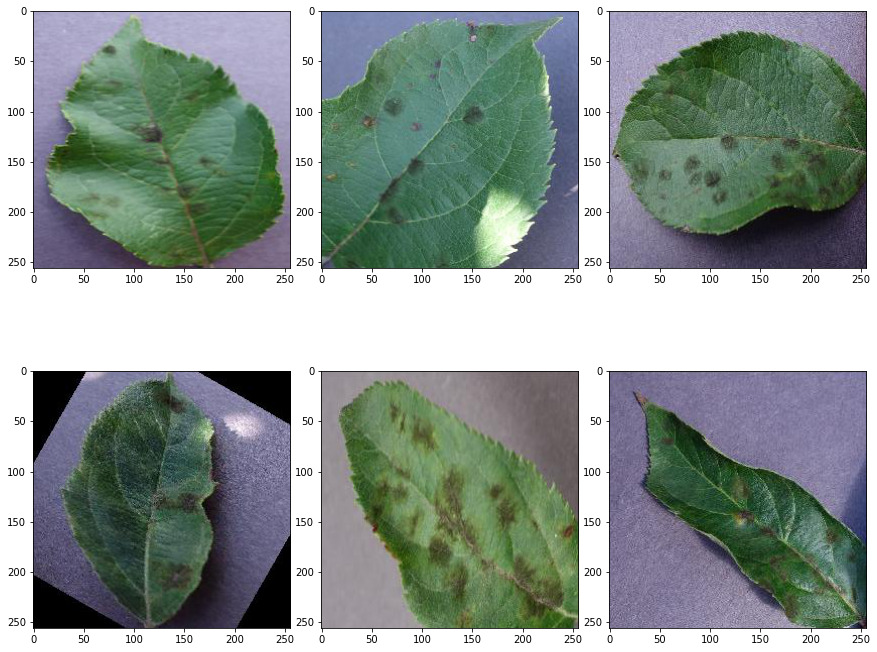

In [20]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[0]))
axs[0,1].imshow(show_image(*train[5]))
axs[1, 0].imshow(show_image(*train[18]))
axs[1,1].imshow(show_image(*train[20]))
axs[0,2].imshow(show_image(*train[55]))
axs[1,2].imshow(show_image(*train[255]))

### Black rot

Label :Apple___Black_rot(1)

Label :Apple___Black_rot(1)

Label :Apple___Black_rot(1)

Label :Apple___Black_rot(1)

Label :Apple___Black_rot(1)

Label :Apple___Black_rot(1)


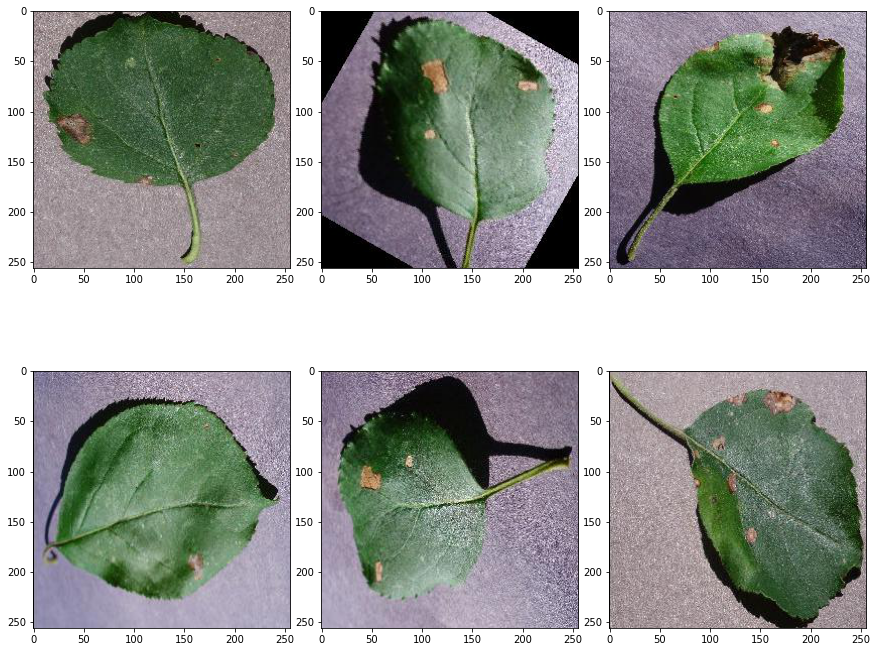

In [21]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[2020]))
axs[0,1].imshow(show_image(*train[2600]))
axs[1, 0].imshow(show_image(*train[3200]))
axs[1,1].imshow(show_image(*train[3220]))
axs[0,2].imshow(show_image(*train[3500]))
axs[1,2].imshow(show_image(*train[3550]))

### Cedar apple rust

Label :Apple___Cedar_apple_rust(2)

Label :Apple___Cedar_apple_rust(2)

Label :Apple___Cedar_apple_rust(2)

Label :Apple___Cedar_apple_rust(2)

Label :Apple___Cedar_apple_rust(2)

Label :Apple___Cedar_apple_rust(2)


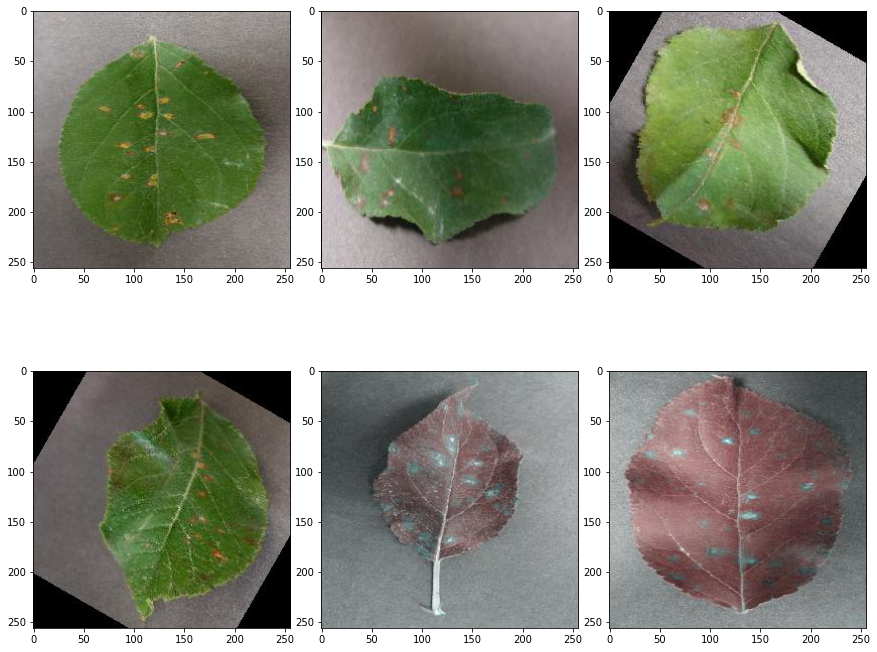

In [22]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[4200]))
axs[0,1].imshow(show_image(*train[4600]))
axs[1, 0].imshow(show_image(*train[5000]))
axs[1,1].imshow(show_image(*train[5110]))
axs[0,2].imshow(show_image(*train[5150]))
axs[1,2].imshow(show_image(*train[5400]))

## Tomato

### Healthy

Label :Tomato___healthy(37)

Label :Tomato___healthy(37)

Label :Tomato___healthy(37)

Label :Tomato___healthy(37)

Label :Tomato___healthy(37)

Label :Tomato___healthy(37)


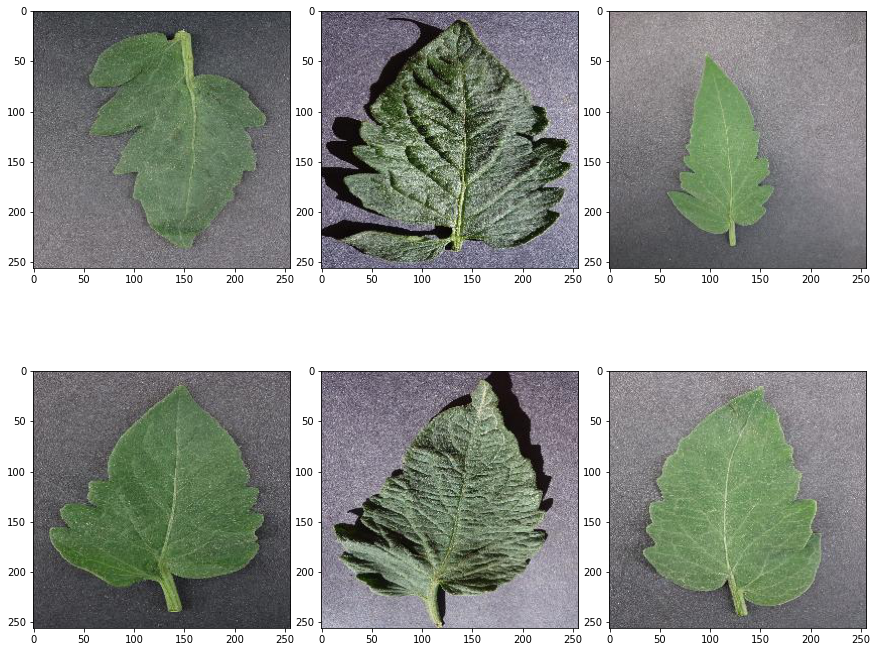

In [23]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[69000]))
axs[0,1].imshow(show_image(*train[69500]))
axs[1, 0].imshow(show_image(*train[69510]))
axs[1,1].imshow(show_image(*train[69600]))
axs[0,2].imshow(show_image(*train[69750]))
axs[1,2].imshow(show_image(*train[70000]))

### Becterial spot

Label :Tomato___Bacterial_spot(28)

Label :Tomato___Bacterial_spot(28)

Label :Tomato___Bacterial_spot(28)

Label :Tomato___Bacterial_spot(28)

Label :Tomato___Bacterial_spot(28)

Label :Tomato___Bacterial_spot(28)


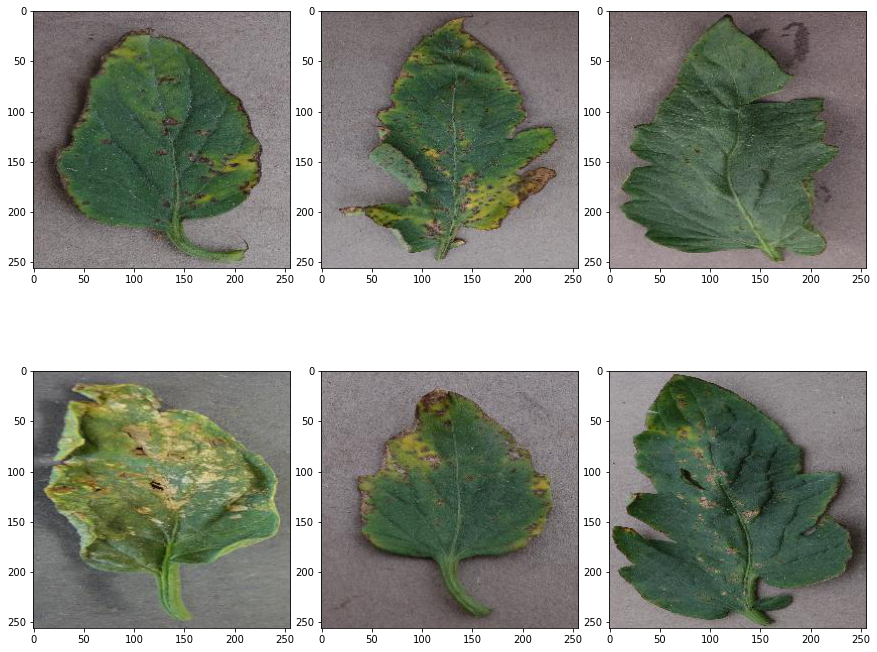

In [24]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[53000]))
axs[0,1].imshow(show_image(*train[53100]))
axs[1, 0].imshow(show_image(*train[53150]))
axs[1,1].imshow(show_image(*train[53225]))
axs[0,2].imshow(show_image(*train[53230]))
axs[1,2].imshow(show_image(*train[53260]))

### Early blight 

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)


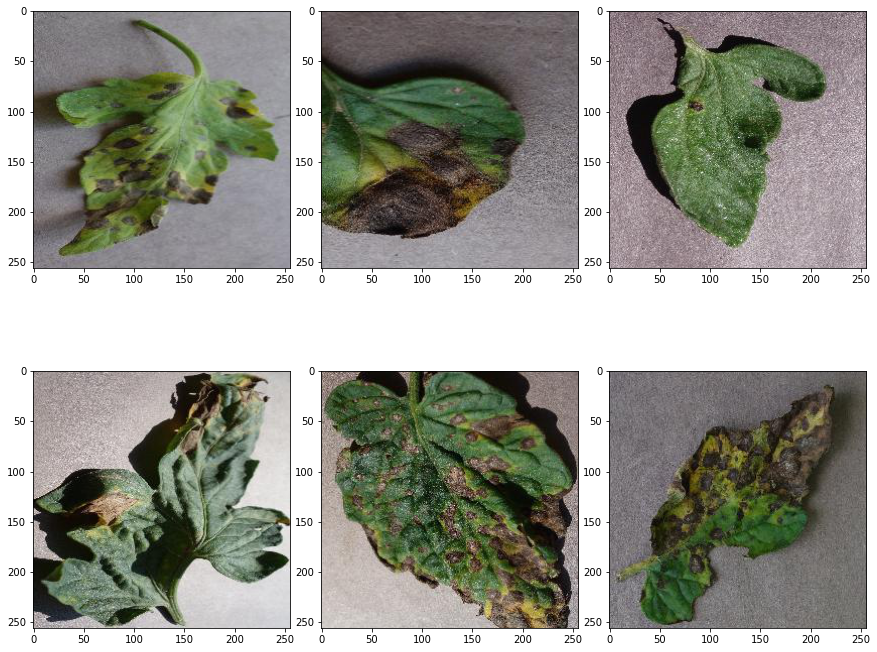

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[54000]))
axs[0,1].imshow(show_image(*train[54100]))
axs[1, 0].imshow(show_image(*train[54119]))
axs[1,1].imshow(show_image(*train[54150]))
axs[0,2].imshow(show_image(*train[54220]))
axs[1,2].imshow(show_image(*train[54223]))

### late blight

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)

Label :Tomato___Early_blight(29)


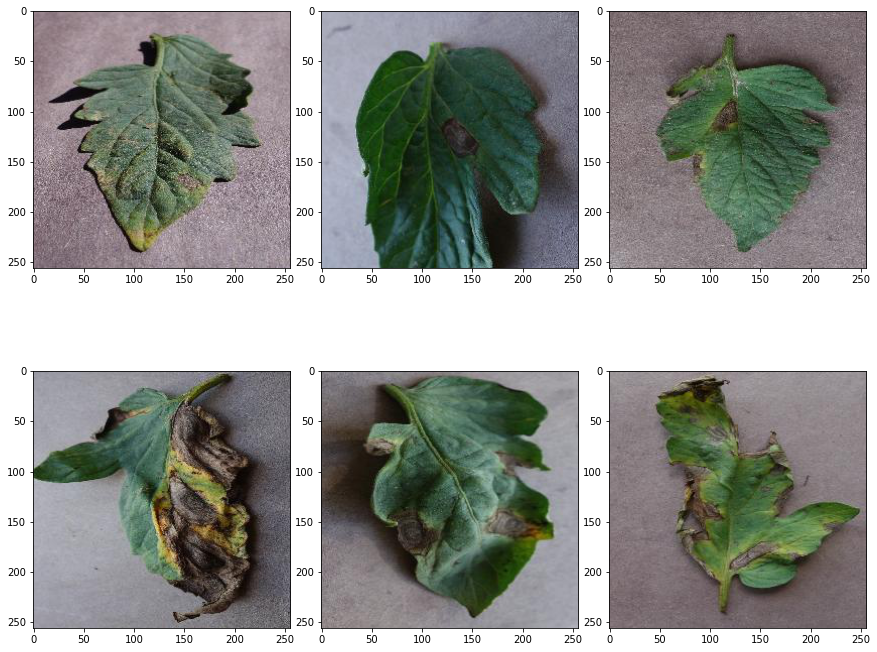

In [26]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[54511]))
axs[0,1].imshow(show_image(*train[54550]))
axs[1, 0].imshow(show_image(*train[54560]))
axs[1,1].imshow(show_image(*train[54600]))
axs[0,2].imshow(show_image(*train[54610]))
axs[1,2].imshow(show_image(*train[54620]))

# Modeling

In [27]:
train_data =keras.utils.image_dataset_from_directory(train_dir ,
                                         image_size=(256, 256))
valid_data = keras.utils.image_dataset_from_directory(valid_dir,
                                        image_size=(256, 256))


Found 70295 files belonging to 38 classes.

Found 17572 files belonging to 38 classes.


In [28]:
rescale = keras.layers.Rescaling(scale=1.0/255)

In [29]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))

Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators

## Model 1

In [30]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(256, activation='relu'))
model_1.add(keras.layers.Dense(38, activation='softmax'))

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 254, 254, 32)      896       

                                                                 

 dropout (Dropout)           (None, 254, 254, 32)      0         

                                                                 

 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         

 )                                                               

                                                                 

 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     

                                                                 

 dropout_1 (Dropout)         (None, 125, 125, 64)      0         

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         

 2D)                                    

In [31]:
history = model_1.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10

2197/2197 [==============================] - 269s 118ms/step - loss: 0.8474 - accuracy: 0.7485 - val_loss: 0.5214 - val_accuracy: 0.8444

Epoch 2/10

2197/2197 [==============================] - 256s 116ms/step - loss: 0.2425 - accuracy: 0.9207 - val_loss: 0.3179 - val_accuracy: 0.8968

Epoch 3/10

2197/2197 [==============================] - 256s 116ms/step - loss: 0.1366 - accuracy: 0.9549 - val_loss: 0.2988 - val_accuracy: 0.9052

Epoch 4/10

2197/2197 [==============================] - 255s 116ms/step - loss: 0.0981 - accuracy: 0.9683 - val_loss: 0.2308 - val_accuracy: 0.9328

Epoch 5/10

2197/2197 [==============================] - 255s 116ms/step - loss: 0.0841 - accuracy: 0.9742 - val_loss: 0.3881 - val_accuracy: 0.8908

Epoch 6/10

2197/2197 [==============================] - 256s 116ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.3442 - val_accuracy: 0.9060

Epoch 7/10

2197/2197 [==============================] - 255s 116ms/step - loss: 0.0631 - accuracy: 

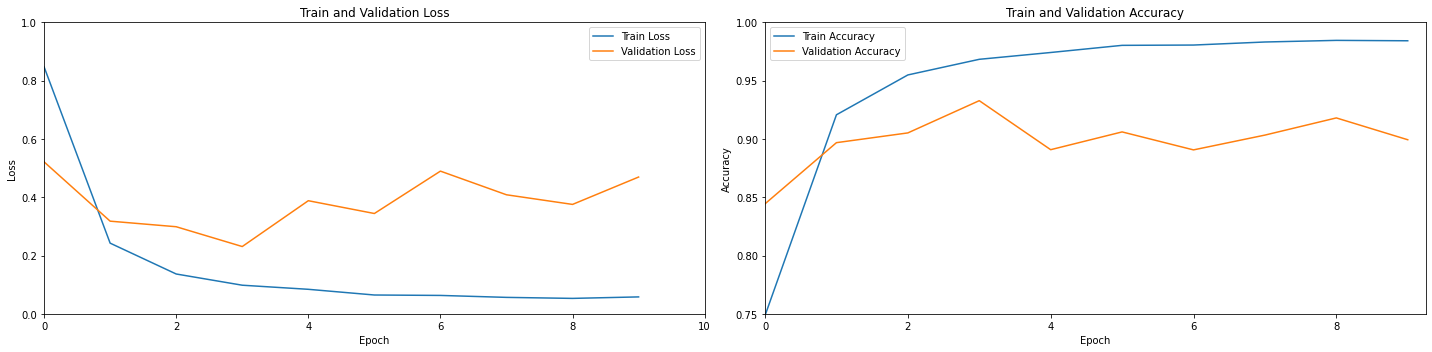

In [32]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_1.predict(x),1).numpy())

In [34]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [35]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.42 %

Test Accuracy   : 89.93 %

Precision Score : 89.93 %

Recall Score    : 89.93 %


## model 2

In [36]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))
model_2.add(keras.layers.BatchNormalization())

model_2.add(keras.layers.Conv2D(32, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(256, activation='relu'))

model_2.add(keras.layers.Dense(38, activation='softmax'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       

                                                                 

 batch_normalization (BatchN  (None, 254, 254, 32)     128       

 ormalization)                                                   

                                                                 

 conv2d_4 (Conv2D)           (None, 252, 252, 32)      9248      

                                                                 

 max_pooling2d_3 (MaxPooling  (None, 126, 126, 32)     0         

 2D)                                                             

                                                                 

 conv2d_5 (Conv2D)           (None, 124, 124, 64)      18496     

                                                                 

 max_pooling2d_4 (MaxPooling  (None, 6

In [37]:
history = model_2.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

  This is separate from the ipykernel package so we can avoid doing imports until


2197/2197 [==============================] - 344s 156ms/step - loss: 1.1779 - accuracy: 0.6596 - val_loss: 0.6280 - val_accuracy: 0.7991

Epoch 2/10

2197/2197 [==============================] - 340s 155ms/step - loss: 0.3083 - accuracy: 0.9008 - val_loss: 0.4195 - val_accuracy: 0.8721

Epoch 3/10

2197/2197 [==============================] - 339s 154ms/step - loss: 0.1617 - accuracy: 0.9489 - val_loss: 0.6616 - val_accuracy: 0.8312

Epoch 4/10

2197/2197 [==============================] - 339s 154ms/step - loss: 0.1082 - accuracy: 0.9666 - val_loss: 0.6559 - val_accuracy: 0.8521

Epoch 5/10

2197/2197 [==============================] - 338s 154ms/step - loss: 0.0918 - accuracy: 0.9721 - val_loss: 0.4855 - val_accuracy: 0.8857

Epoch 6/10

2197/2197 [==============================] - 338s 154ms/step - loss: 0.0802 - accuracy: 0.9767 - val_loss: 0.6656 - val_accuracy: 0.8632

Epoch 7/10

2197/2197 [==============================] - 338s 154ms/step - loss: 0.0700 - accuracy: 0.9801 - val

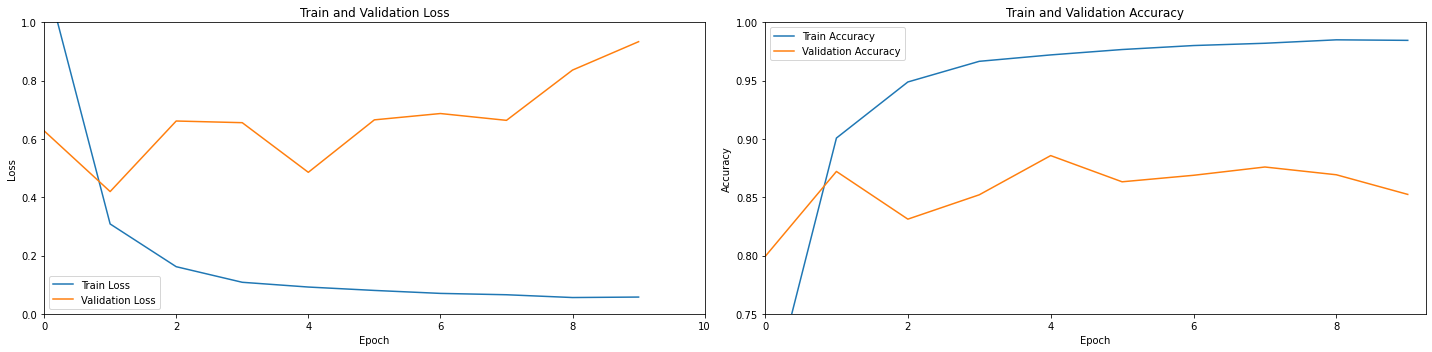

In [38]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_2.predict(x),1).numpy())

In [40]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [41]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.46 %

Test Accuracy   : 85.24 %

Precision Score : 85.24 %

Recall Score    : 85.24 %


## Model 3

In [42]:
model_3 = keras.Sequential()

model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model_3.add(keras.layers.Flatten())

model_3.add(keras.layers.Dense(1568,activation="relu"))
model_3.add(keras.layers.Dropout(0.5))

model_3.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       

                                                                 

 conv2d_8 (Conv2D)           (None, 256, 256, 32)      9248      

                                                                 

 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         

 2D)                                                             

                                                                 

 conv2d_9 (Conv2D)           (None, 85, 85, 64)        18496     

                                                                 

 conv2d_10 (Conv2D)          (None, 85, 85, 64)        36928     

                                                                 

 max_pooling2d_7 (MaxPooling  (None, 28, 28, 64)       0         

 2D)                                  

In [43]:
history = model_3.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.

  This is separate from the ipykernel package so we can avoid doing imports until


2197/2197 [==============================] - 386s 174ms/step - loss: 1.8137 - accuracy: 0.4733 - val_loss: 0.5547 - val_accuracy: 0.8278

Epoch 2/10

2197/2197 [==============================] - 381s 174ms/step - loss: 0.4954 - accuracy: 0.8425 - val_loss: 0.3546 - val_accuracy: 0.8844

Epoch 3/10

2197/2197 [==============================] - 382s 174ms/step - loss: 0.2860 - accuracy: 0.9065 - val_loss: 0.2389 - val_accuracy: 0.9227

Epoch 4/10

2197/2197 [==============================] - 395s 180ms/step - loss: 0.2029 - accuracy: 0.9330 - val_loss: 0.1920 - val_accuracy: 0.9393

Epoch 5/10

2197/2197 [==============================] - 381s 174ms/step - loss: 0.1525 - accuracy: 0.9492 - val_loss: 0.1488 - val_accuracy: 0.9537

Epoch 6/10

2197/2197 [==============================] - 381s 173ms/step - loss: 0.1142 - accuracy: 0.9618 - val_loss: 0.1430 - val_accuracy: 0.9546

Epoch 7/10

2197/2197 [==============================] - 381s 173ms/step - loss: 0.0897 - accuracy: 0.9691 - val

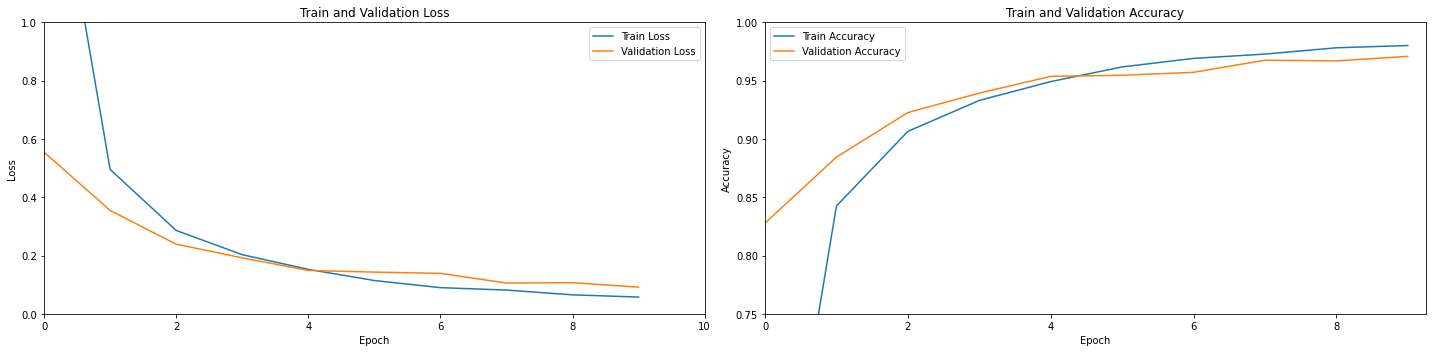

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_3.predict(x),1).numpy())

In [46]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [47]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.02 %

Test Accuracy   : 97.09 %

Precision Score : 97.09 %

Recall Score    : 97.09 %


<Figure size 1440x360 with 0 Axes>

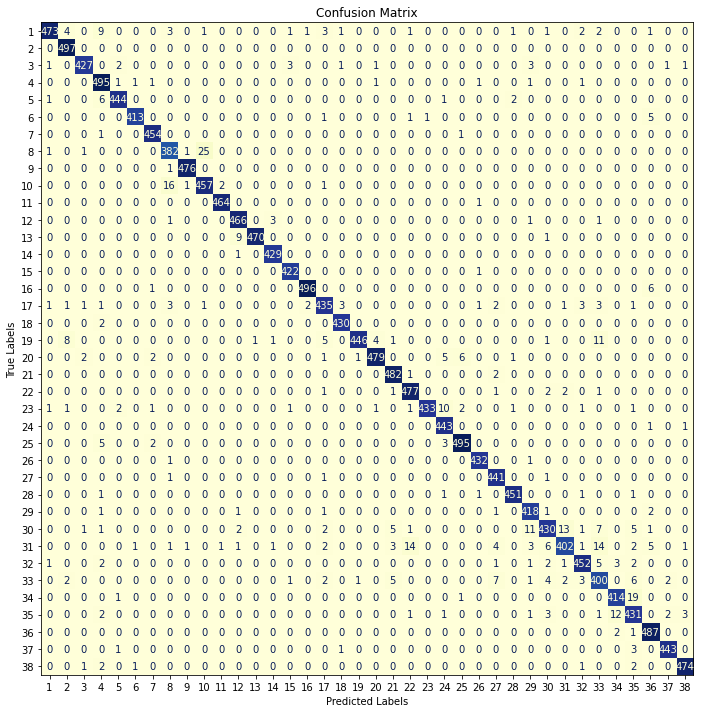

In [48]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Save and load the model

In [49]:
#from tensorflow.keras.models import load_model
#m3_saved = model_3.save("/content/drive/MyDrive/my model/model_3.h5")

In [50]:
#model3 = keras.models.load_model("/content/drive/MyDrive/my model/model_3.h5")
#model3.summary()

### Test the model with test data

We only have 33 images in test data, so let's check the model on all images


1/1 [==============================] - 0s 377ms/step


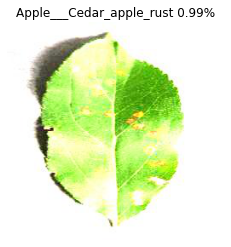

1/1 [==============================] - 0s 36ms/step


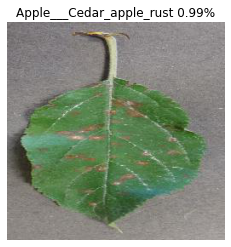

1/1 [==============================] - 0s 18ms/step


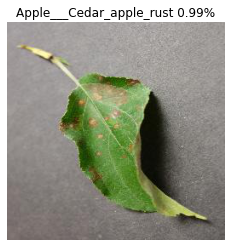

1/1 [==============================] - 0s 22ms/step


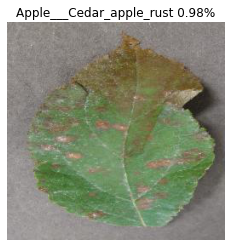

1/1 [==============================] - 0s 17ms/step


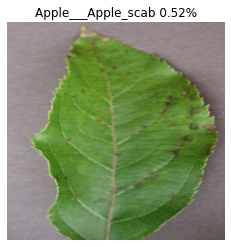

1/1 [==============================] - 0s 23ms/step


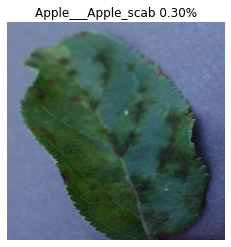

1/1 [==============================] - 0s 18ms/step


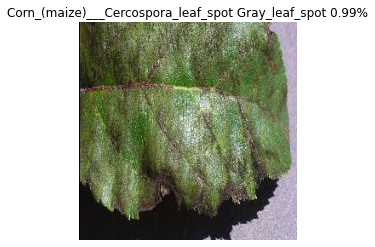

1/1 [==============================] - 0s 22ms/step


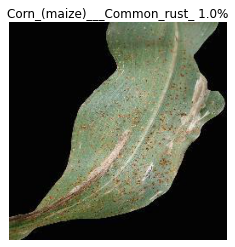

1/1 [==============================] - 0s 17ms/step


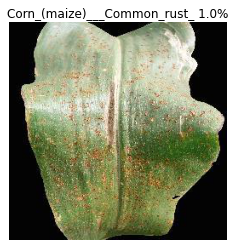

1/1 [==============================] - 0s 17ms/step


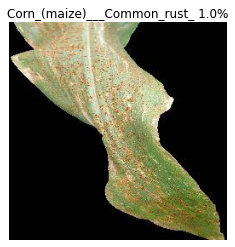

In [55]:
Li = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
      'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
      'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
      'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
      'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
      'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
      'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
      'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="/content/new-plant-diseases-dataset/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,10):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model_3.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = Li[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()